# Punto 3

In [2]:
import pyterrier as pt
from matplotlib import pyplot as plt

In [3]:
vaswani_dataset = pt.datasets.get_dataset("vaswani")
indexref = vaswani_dataset.get_index()
index = pt.IndexFactory.of(indexref)

Java started (triggered by IndexFactory.of) and loaded: pyterrier.java, pyterrier.terrier.java [version=5.11 (build: craig.macdonald 2025-01-13 21:29), helper_version=0.0.8]


In [4]:
topics = vaswani_dataset.get_topics()
topics.head(10)

15:45:44.260 [main] WARN org.terrier.applications.batchquerying.TRECQuery -- trec.encoding is not set; resorting to platform default (windows-1252). Retrieval may be platform dependent. Recommend trec.encoding=UTF-8


,qid,query
0,1,measurement of dielectric constant of liquids ...
1,2,mathematical analysis and design details of wa...
2,3,use of digital computers in the design of band...
3,4,systems of data coding for information transfer
4,5,use of programs in engineering testing of comp...
5,6,number representation in binary machines
6,7,secondary emission of electrons by positive io...
7,8,measurement of plasma temperatures in arc disc...
8,9,characteristics of the single electrode discha...
9,10,methods of calculating instantaneous power dis...


In [41]:
retr = pt.terrier.Retriever(index, controls = {"wmodel": "Hiemstra_LM"})

qrels = vaswani_dataset.get_qrels()

retr.setControl("wmodel", "Hiemstra_LM")

In [42]:
res=retr.transform(topics)

metrics_global = ["P_10", "map", "ndcg_cut_10"]
evaluate_global = pt.Evaluate(res, qrels, metrics=metrics_global)
print("Métricas globales:")
evaluate_global

Métricas globales:


{'P_10': 0.3215053763440861,
 'map': 0.2535179497341302,
 'ndcg_cut_10': 0.39472296386018196}

C:\Users\lukfi\AppData\Local\Temp\ipykernel_14896\1683063101.py:1: DeprecationWarning: Call to deprecated function (or staticmethod) evaluate. (Use pt.Evaluate instead) -- Deprecated since version 0.9.
  recall = pt.Utils.evaluate(res, qrels, metrics=["iprec_at_recall_0.00", "iprec_at_recall_0.10", "iprec_at_recall_0.20", "iprec_at_recall_0.30", "iprec_at_recall_0.40",


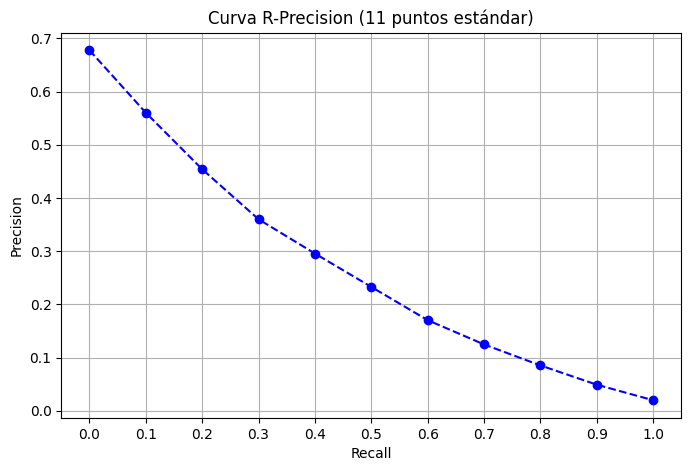

In [43]:
recall = pt.Utils.evaluate(res, qrels, metrics=["iprec_at_recall_0.00", "iprec_at_recall_0.10", "iprec_at_recall_0.20", "iprec_at_recall_0.30", "iprec_at_recall_0.40",
                                       "iprec_at_recall_0.50", "iprec_at_recall_0.60", "iprec_at_recall_0.70", "iprec_at_recall_0.80", "iprec_at_recall_0.90",
                                       "iprec_at_recall_1.00"])

precision_values = [
    recall["iprec_at_recall_0.00"],
    recall["iprec_at_recall_0.10"],
    recall["iprec_at_recall_0.20"],
    recall["iprec_at_recall_0.30"],
    recall["iprec_at_recall_0.40"],
    recall["iprec_at_recall_0.50"],
    recall["iprec_at_recall_0.60"],
    recall["iprec_at_recall_0.70"],
    recall["iprec_at_recall_0.80"],
    recall["iprec_at_recall_0.90"],
    recall["iprec_at_recall_1.00"]
]

recall_points = [0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]

plt.figure(figsize=(8, 5))
plt.plot(recall_points, precision_values, marker="o", linestyle="--", color="b")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Curva R-Precision (11 puntos estándar)")
plt.grid(True)
plt.xticks(recall_points)
plt.show()